In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
% matplotlib inline

In [2]:
csv0 = '../results/injrecovresult/success0/irresult_sap_top1.csv'
csv1 = '../results/injrecovresult/success1/irresult_sap_top1.csv'
df0 = pd.read_csv(csv0)
df1 = pd.read_csv(csv1)

"success0" was from pre whitening RMS (just a single subtraction).
"success1" is from post-whitening RMS (maximum 8, and setting a limit of 0.05% RMS).

In [3]:
df0.describe()

,P_inj,P_rec,coarseperiod,depth,kebc_period,kicid,morph,rms_biased,t0_inj,t0_rec
count,272.000000,272.000000,272.000000,272.000000,272.000000,2.720000e+02,272.000000,272.000000,272.000000,272.000000
mean,10.472871,8.941122,8.937068,0.006661,0.740173,7.799794e+06,0.831397,0.003495,258.757161,258.363486
std,12.549115,13.202099,13.183547,0.006852,0.584261,2.531220e+06,0.105244,0.002902,314.882070,315.826601
min,1.060859,1.052115,1.057390,0.000625,0.235855,2.831632e+06,0.610000,0.000248,120.597621,120.560376
25%,3.668415,1.883629,1.883628,0.001250,0.346634,5.878836e+06,0.770000,0.001324,131.675943,131.421968
50%,7.253332,4.128088,4.128088,0.005000,0.503178,7.871200e+06,0.840000,0.002626,134.019183,132.970904
75%,12.941931,9.515519,9.516345,0.010000,0.979163,1.003239e+07,0.920000,0.004737,151.841264,154.987764
max,115.979461,92.270546,92.168220,0.020000,2.963678,1.210428e+07,0.990000,0.014190,1557.958375,1527.791323


In [4]:
df1.describe()

,P_inj,P_rec,coarseperiod,depth,kebc_period,kicid,morph,rms_biased,t0_inj,t0_rec
count,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02,540.00000,540.000000,540.000000,540.000000
mean,24.257873,16.041303,16.041116,0.003281,0.969506,8.028825e+06,0.84300,0.001148,277.469024,274.340531
std,53.377122,28.924708,28.924874,0.003387,1.769439,2.489189e+06,0.11563,0.001270,363.231427,363.095794
min,0.798930,0.714090,0.714090,0.000313,0.160073,2.577756e+06,0.61000,0.000112,120.551436,121.732168
25%,4.382231,3.133406,3.133416,0.000625,0.336703,6.045264e+06,0.76000,0.000490,131.285304,128.469130
50%,9.649252,6.451384,6.451381,0.001875,0.436549,8.039442e+06,0.88500,0.000841,135.111368,135.091935
75%,21.731457,15.080311,15.080322,0.005000,0.671526,1.008412e+07,0.94000,0.001218,159.001924,149.149438
max,598.129349,219.376631,219.377289,0.010000,14.587612,1.260298e+07,1.00000,0.009408,1491.409985,1486.599711


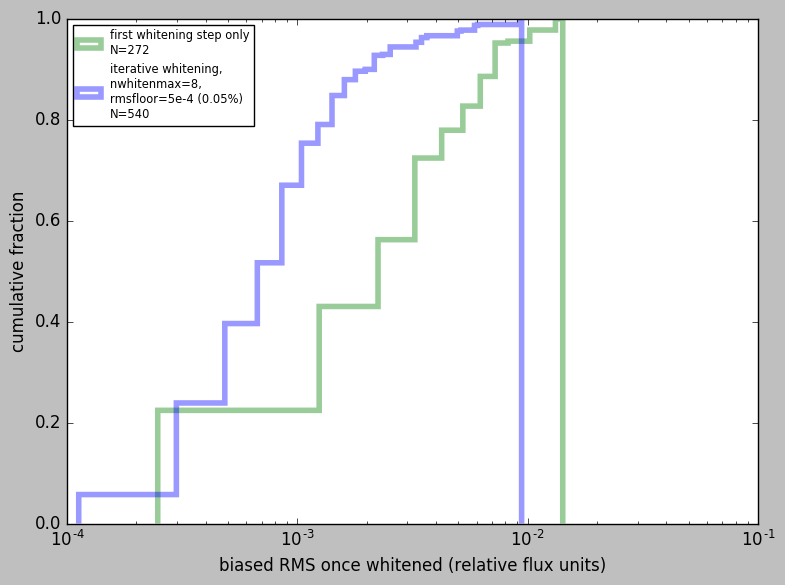

In [5]:
import seaborn as sns
plt.close('all')
plt.style.use('classic')

ax = sns.distplot(df0['rms_biased'], kde=False, norm_hist=True,
             label='first whitening step only'+\
                   '\nN={:d}'.format(int(len(df0))),
             hist_kws={'cumulative':True,
                       'histtype':'step',
                       'linewidth':4,
                       'color': 'g'})

ax = sns.distplot(df1['rms_biased'], kde=False, norm_hist=True, 
             label='iterative whitening,\nnwhitenmax=8,\nrmsfloor=5e-4 (0.05%)'+\
                   '\nN={:d}'.format(int(len(df1))),
             hist_kws={'cumulative':True,
                       'histtype':'step',
                       'linewidth':4,
                       'color': 'b'})

ax.set(xscale='log', ylim=[0,1], ylabel='cumulative fraction',
      xlabel='biased RMS once whitened (relative flux units)')
ax.legend(loc='upper left', fontsize='x-small')
plt.tight_layout()
savedir = '../results/injrecovresult/plots/'
fname = 'cdf_whitening_methods_compare.pdf'
plt.savefig(savedir+fname, bbox_inches='tight')
plt.show()